# <span style="color:teal">RBFE Network - Analysis</span>


In [1]:
# import libraries

from scipy.stats import sem as sem
import sys
import glob

if '/home/anna/Documents/cinnabar' not in sys.path:
    sys.path.insert(1, '/home/anna/Documents/cinnabar')
import cinnabar

print("adding code to the pythonpath...")
code = '/home/anna/Documents/code/python'
if code not in sys.path:
    sys.path.insert(1, code)
import pipeline

print(cinnabar.__file__)

from pipeline import *
from pipeline.utils import validate
from pipeline.analysis import *

adding code to the pythonpath...


Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


/home/anna/Documents/cinnabar/cinnabar/__init__.py


In [2]:
bench_folder = f"/home/anna/Documents/benchmark"
protein = "tyk2"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
exp_file = f"{bench_folder}/inputs/experimental/{protein}.yml"

if os.path.exists(f"{main_dir}/outputs_extracted/results"):
    results_folder = f"{main_dir}/outputs_extracted/results"
elif os.path.exists(f"{main_dir}/outputs/results"):
    results_folder = f"{main_dir}/outputs/results"
else:
    raise ValueError(f"results directory not found in the {main_dir}. please make sure results were written using the analysis script previously in the pipeline")

output_folder = validate.folder_path(f"{main_dir}/analysis", create=True)


In [3]:
all_analysis_object = analysis_network(results_folder,
                                       exp_file=exp_file,
                                       net_file=net_file,
                                       output_folder=output_folder,
                                       analysis_prot=ana_file
                                        )

# can add any other results files
# all_analysis_object.compute_other_results(file_name=None, name=None)
all_analysis_object.compute(cycle_closure=False, use_cinnabar=False)

no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'SOMD'
could not convert val SOMD values for plotting. None will be used. Was cinnabar analysis carried out correctly?
no cinnabar calculation has been performed. Can only plot 'pert' values.
'AMBER'
could not convert val AMBER values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'GROMACS'
could not convert val GROMACS values for plotting. None will be used. Was cinnabar analysis carried out correctly?
'SOMD'
could not convert val SOMD values for plotting. None will be used. Was cinnabar analysis carried out correctly?


In [6]:
all_analysis_object.compute_convergence(main_dir=main_dir)
all_analysis_object.plot_convergence()

could not load pickles for lig_ejm42~lig_ejm49 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_ejm49 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_ejm48 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_ejm53 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm42~lig_ejm47 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_ejm47 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_jmc23 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_ejm46 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm44~lig_ejm45 in AMBER. Was it analysed for convergence?
could not load pickles for lig_ejm31~lig_ejm45 in AMBER. Was it analysed for convergence?
could not load pickles for lig_jmc28~lig_jmc30 in AMBER. Was it analysed for convergence?
could not 

In [8]:
# check if there are any failed perturbations
failed_perts = all_analysis_object.failed_runs("GROMACS")
print(failed_perts)
print(" ")

22 out of 24 have results, which is 91.66666666666666 %.
['lig_ejm44~lig_ejm45', 'lig_ejm31~lig_ejm45']
 


In [54]:
with open("/home/anna/Documents/benchmark/new_files/new_p38_network_somd_reruns.dat", "w") as write_file:
    with open("/home/anna/Documents/benchmark/new_files/new_p38_network_both.dat", "r") as file:
        for line in file.readlines():
            pert = f"{line.split(' ')[0]}~{line.split(' ')[1]}"
            eng = line.split(' ')[-1].upper().strip()

            if pert in failed_perts:
                if eng == "SOMD":
                    write_file.write(line)
        

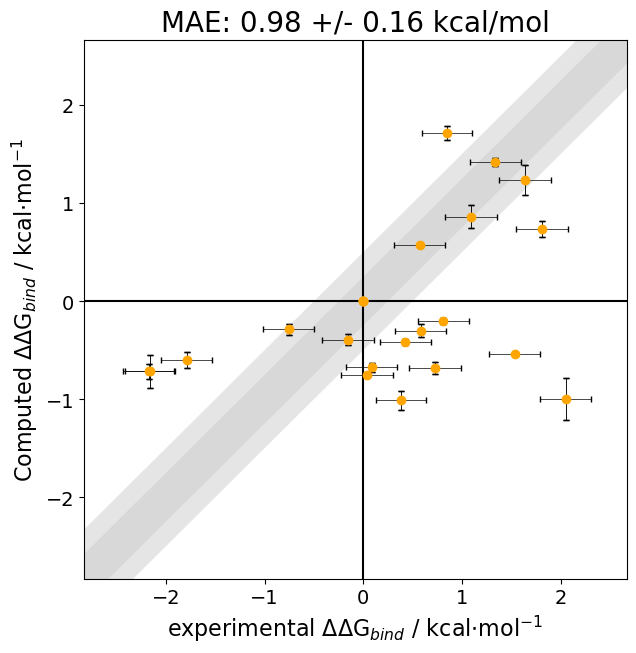

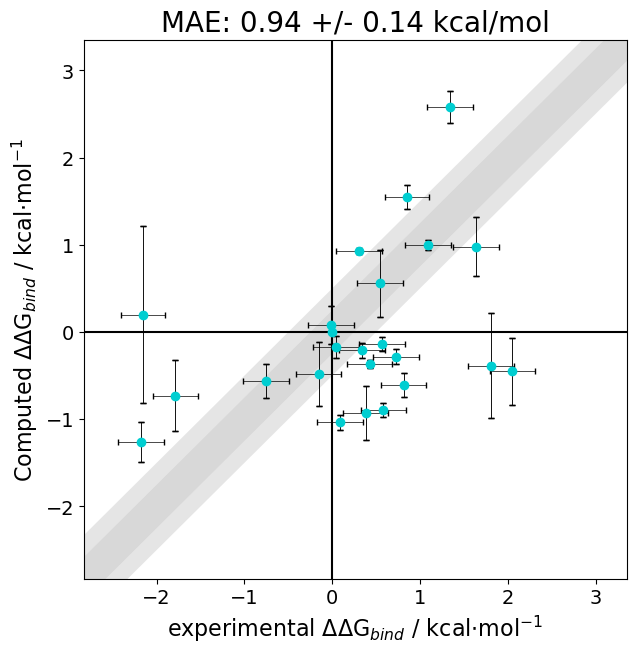

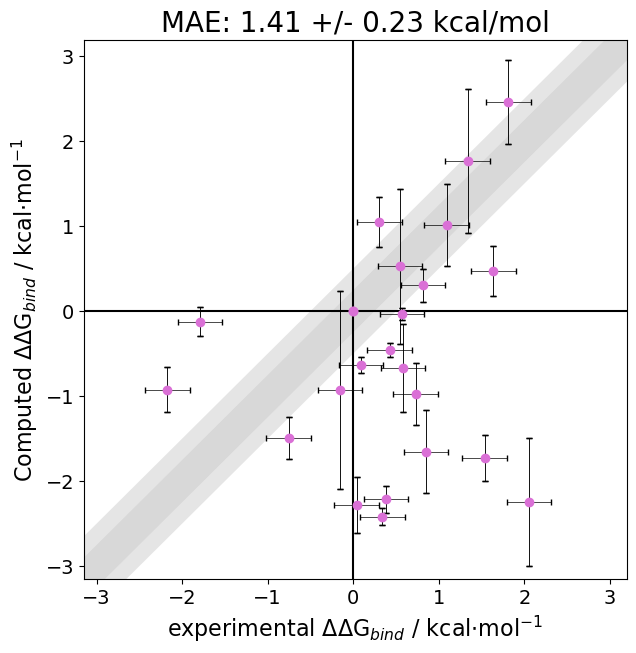

In [4]:
for eng in all_analysis_object.engines:
    mae = all_analysis_object._stats_object.compute_mue(y=eng, pert_val='pert')
    stats_string = f"MAE: {mae[0]:.2f} +/- {mae[1]:.2f} kcal/mol"
    all_analysis_object.plot_scatter_pert(engine=eng, **{"title":stats_string, "key":False, "save":f"/home/anna/Desktop/{eng}"})

There are different options for plotting:
bar (pert or lig)
scatter (pert or lig) - can be plotted using cinnabar
eng vs eng
other results (eg from other workflows)
outliers
histograms (for the error of the runs, sem, legs)

In [ ]:
# bar
all_analysis_object.plot_bar_lig()
all_analysis_object.plot_bar_pert()

#scatter
all_analysis_object.plot_scatter_lig()
all_analysis_object.plot_scatter_pert()
all_analysis_object.plot_scatter_lig(use_cinnabar=True)
all_analysis_object.plot_scatter_pert(use_cinnabar=True)
for eng in all_analysis_object.engines:
    all_analysis_object.plot_scatter_lig(engine=eng)
    all_analysis_object.plot_scatter_pert(engine=eng)

    # outliers
    all_analysis_object.plot_outliers(engine=eng)
    all_analysis_object.plot_outliers(engine=eng, pert_val="val")

all_analysis_object.plot_histogram_legs(free_bound="free")
all_analysis_object.plot_histogram_legs(free_bound="bound")
all_analysis_object.plot_histogram_runs()
all_analysis_object.plot_histogram_sem()
all_analysis_object.plot_histogram_sem(pert_val="pert")

for additional analyses:
calculate the mae
fwf stuff

In [ ]:
all_analysis_object.calc_mae(pert_val="pert")
# all_analysis_object.calc_mae(pert_val="val")

plot other results

In [ ]:
other_results = glob.glob("/home/anna/Documents/benchmark/inputs/other_computed/exscentia/*_exscentia_mcl1.csv")
all_analysis_object.compute_other_results(other_results, name="Exscientia")
all_analysis_object.plot_other_results(name="Exscientia", engine="AMBER", pert_val="pert")

plot convergence

In [ ]:
ex_outputs_folder = f"{main_dir}/outputs_extracted"

converg_obj = plot_convergence(ex_outputs_folder,
                               perturbations=all_analysis_object.perturbations,
                               engines=all_analysis_object.engines,
                               file_ext=file_ext
                               )

converg_obj.plot_convergence_all()

remove a perturbation

In [ ]:
# check which perturbations are outliers
all_analysis_object.plot_outliers(engine="GROMACS", outliers=5, pert_val="pert")
# all_analysis_object._plotting_object.outlier(engines="AMBER", outliers=5, name="Exscientia")

In [ ]:
# remove perturbation for all engines
all_analysis_object.remove_perturbations("lig_c~lig_d")

remove outliers

In [ ]:
all_analysis_object.remove_outliers(threshold=10, verbose=True)

calculate only the experimental results for some of the perturbations

In [ ]:
protein = "mcl1"

bench_folder = f"/home/anna/Documents/benchmark"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
# net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
# exp_file = f"{bench_folder}/inputs/experimental/tyk2.yml"
exp_file = f"/home/anna/Documents/benchmark/inputs/experimental/{protein}.yml"

output_folder = validate.folder_path(f"{main_dir}/diff_methods_analysis", create=True)
results_folder = f"{main_dir}/diff_methods_analysis/results"

all_analysis_object = analysis_network(
                                       exp_file=exp_file
                                        )

all_analysis_object.perturbations = ["lig_27~lig_59","lig_27~lig_48","lig_28~lig_47","lig_35~lig_52","lig_38~lig_48","lig_43~lig_45","lig_53~lig_56","lig_30~lig_40", "lig_27~lig_48"]
all_analysis_object.ligands = get_ligands_from_perts(all_analysis_object.perturbations)
all_analysis_object.get_experimental()
all_analysis_object.get_experimental_pert()

plot only a small amount of perturbations to compare different methods

In [ ]:
perturbations = ["lig_30~lig_40", "lig_27~lig_48"]

In [ ]:
protein = "mcl1"

bench_folder = f"/home/anna/Documents/benchmark"
main_dir = f"{bench_folder}/extracted/{protein}"

# choose location for the files
# net_file = f"{main_dir}/execution_model/network_lomap.dat"
ana_file = f"{main_dir}/execution_model/analysis_protocol.dat"
# exp_file = f"{bench_folder}/inputs/experimental/tyk2.yml"
exp_file = f"/home/anna/Documents/benchmark/inputs/experimental/{protein}.yml"

output_folder = validate.folder_path(f"{main_dir}/diff_methods_analysis", create=True)
results_folder = f"{main_dir}/diff_methods_analysis/results"

all_analysis_object = analysis_network(results_folder,
                                       exp_file=exp_file,
                                       engines="AMBER",
                                    #    net_file=net_file,
                                       output_folder=output_folder,
                                       analysis_ext=ana_file
                                        )

# can add any other results files
# all_analysis_object.compute_other_results(file_name=None, name=None)
all_analysis_object.compute(cycle_closure=False, use_cinnabar=False)

In [ ]:
other_names = ["exscientia_inputs","both","Exscientia"]

for name in other_names:
    all_analysis_object.compute_other_results(
        sorted(glob.glob(f"{results_folder}/other/*{name}*.csv")),
        name=name, use_cinnabar=False)

all_analysis_object._plotting_object.set_colours({"exscientia_inputs":"red", "both":"yellow","Exscientia":"purple"})

In [ ]:
all_analysis_object._plotting_object.scatter(pert_val="pert",engines=["exscientia_inputs"], name="Exscientia")

compare to the fwf analysis

In [ ]:
# choose an engine
eng = "SOMD"

# first need to add the fwf path
all_analysis_object._add_fwf_path('/home/anna/Documents/september_2022_workshops/freenrgworkflows/networkanalysis')

# get the experimental dictionary
exp_dicts = all_analysis_object._get_exp_fwf()
for key in exp_dicts[0]:
    print(f"{key} : {exp_dicts[0][key][0]}, {exp_dicts[0][key][1]}")

# get the network analysis
fwf_dict = all_analysis_object._get_ana_fwf(engine=eng)
for key in fwf_dict:
    print(f"{key} : {fwf_dict[key][0]}, {fwf_dict[key][1]}")

# get fwf stats
fwf_stats = all_analysis_object._get_stats_fwf(engine=eng)


plotting just fwf data per ligand

In [ ]:
dict_y = fwf_dict
dict_exp = exp_dicts[0]

df1 = plotting_engines.match_dicts_to_df(dict_exp, dict_y, "experimental", "fwf")
df1

df1.plot.bar(y=["freenrg_fwf","freenrg_experimental"],
            yerr=df1[["err_fwf","err_experimental"]].T.values,
            title=f"fwf, experimental, {eng}",
            xlabel="ligands",
            ylabel="dG (kcal/mol)")

df1.dropna()
df1.plot.scatter(
        x="freenrg_experimental",y="freenrg_fwf",
        xerr="err_experimental",
        yerr="err_fwf",
        title=f"fwf, {eng}",
        xlabel="experimental dG (kcal/mol)",
        ylabel="fwf dG (kcal/mol)")

# calculating using the cinnabar stats
f_mae = all_analysis_object._stats_object._compute_stats(x=df1["freenrg_experimental"],
                                                 y=df1["freenrg_fwf"],
                                                 xerr=df1["err_experimental"],
                                                 yerr=df1["err_fwf"],
                                                 statistic="MUE")
print(f_mae)

checking cinnabar statistics

In [ ]:
# default x is experimental
all_analysis_object._stats_object.compute_mue(pert_val="val", y="SOMD")
all_analysis_object._stats_object.compute_rmse(pert_val="val", y="SOMD")
all_analysis_object._stats_object.compute_r2(pert_val="val", y="SOMD")
all_analysis_object._stats_object.compute_rho(pert_val="val", y="SOMD")
all_analysis_object._stats_object.compute_rae(pert_val="val", y="SOMD")
all_analysis_object._stats_object.compute_ktau(pert_val="val", y="SOMD")